In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
df = pd.read_csv("F:\BittuNotesPDF\BITTUMEGAPROJECT\Code\GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4573,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
4574,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
4575,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4576,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28976000
4577,2022-10-24,102.089996,103.099998,100.300003,102.970001,102.970001,24651500


In [4]:
#get number of rows and columns
df.shape

(4578, 7)

In [5]:
df=df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


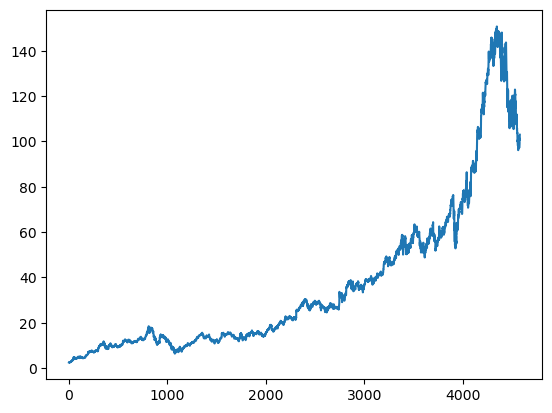

In [6]:
plt.plot(df.Close)

In [7]:
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...,...
4573,4573,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
4574,4574,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
4575,4575,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4576,4576,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28976000


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4573    110.507735
4574    110.427675
4575    110.304985
4576    110.179395
4577    110.067725
Name: Close, Length: 4578, dtype: float64

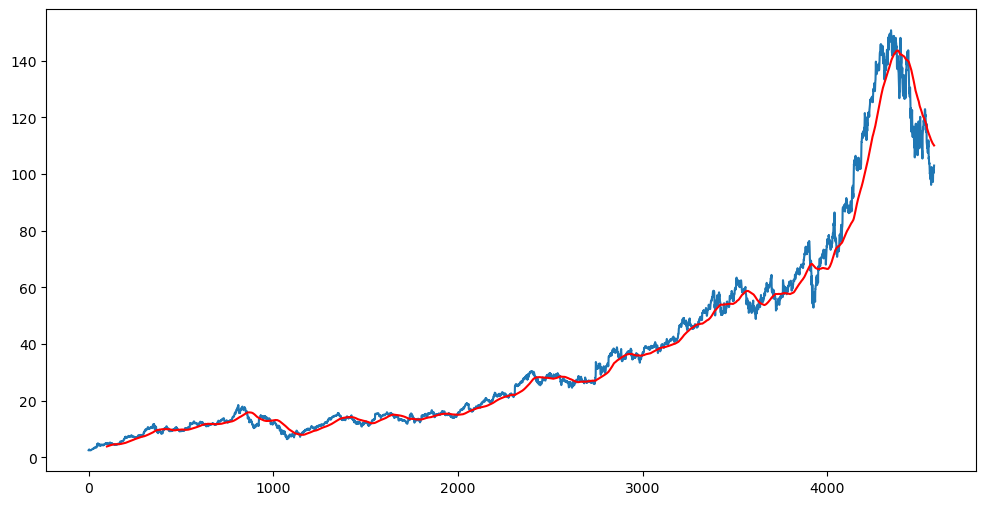

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4573    120.504867
4574    120.280945
4575    120.061512
4576    119.880645
4577    119.707740
Name: Close, Length: 4578, dtype: float64

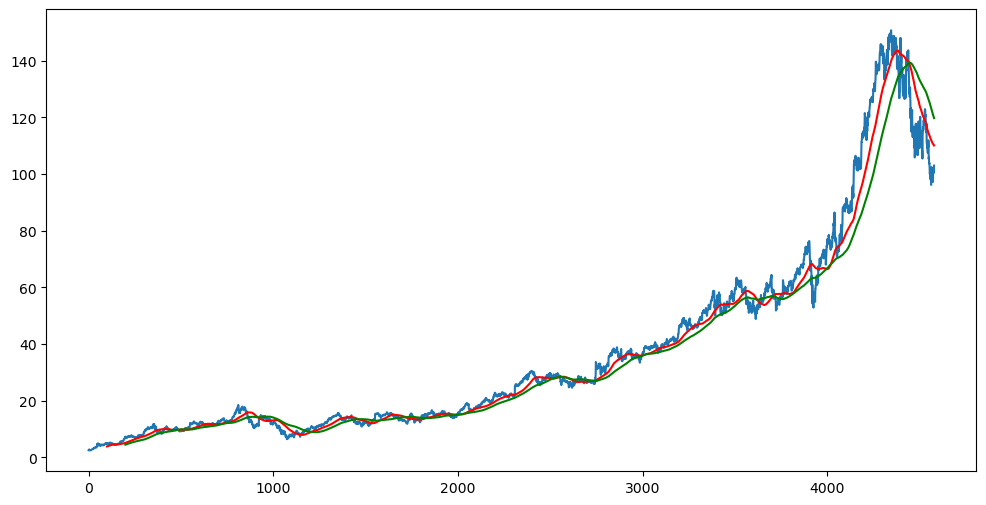

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
#splitting the data into Training and Testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3204, 1)
(1374, 1)


In [13]:
data_training.head()

,Close
0,2.499133
1,2.697639
2,2.724787
3,2.611960
4,2.640104


In [14]:
data_testing.head()

,Close
3204,46.529999
3205,46.611000
3206,46.854000
3207,47.150002
3208,45.980999


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.85871559e-04],
       [4.67451143e-03],
       [5.28838504e-03],
       ...,
       [1.00000000e+00],
       [9.97591833e-01],
       [9.93759035e-01]])

In [17]:
data_training_array.shape

(3204, 1)

In [18]:
# ML

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(3104, 100, 1)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
97/97 [==============================] - 20s 177ms/step - loss: 0.0224
Epoch 2/50
97/97 [==============================] - 17s 178ms/step - loss: 0.0057
Epoch 3/50
97/97 [==============================] - 17s 179ms/step - loss: 0.0049
Epoch 4/50
97/97 [==============================] - 18s 187ms/step - loss: 0.0043
Epoch 5/50
97/97 [==============================] - 19s 193ms/step - loss: 0.0039
Epoch 6/50
97/97 [==============================] - 19s 192ms/step - loss: 0.0037
Epoch 7/50
97/97 [==============================] - 18s 186ms/step - loss: 0.0033
Epoch 8/50
97/97 [==============================] - 18s 187ms/step - loss: 0.0034
Epoch 9/50
97/97 [==============================] - 20s 208ms/step - loss: 0.0030
Epoch 10/50
97/97 [==============================] - 19s 198ms/step - loss: 0.0028
Epoch 11/50
97/97 [==============================] - 20s 203ms/step - loss: 0.0028
Epoch 12/50
97/97 [==============================] - 24s 243ms/step - loss: 0.0027
Epoch 13/50
9

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
3204,46.529999
3205,46.611000
3206,46.854000
3207,47.150002
3208,45.980999


In [27]:
data_testing.tail(100)

,Close
4478,117.746002
4479,114.564003
4480,117.010498
4481,117.229500
4482,117.237999
...,...
4573,101.389999
4574,100.290001
4575,100.529999
4576,101.480003


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15476\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [30]:
final_df.head()

,Close
0,39.892502
1,39.540001
2,39.709999
3,39.820999
4,39.728001


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01160832],
       [0.00846431],
       [0.00998055],
       ...,
       [0.55244474],
       [0.56091799],
       [0.57420754]])

In [32]:
input_data.shape

(1474, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1374, 100, 1)
(1374,)


In [35]:
#make prediction

y_predicted = model.predict(x_test)

43/43 [==============================] - 5s 82ms/step


In [36]:
y_predicted.shape

(1374, 1)

In [37]:
y_test

array([0.07080932, 0.07153178, 0.07369914, ..., 0.55244474, 0.56091799,
       0.57420754])

In [38]:
y_predicted

array([[0.15638644],
       [0.15801698],
       [0.15933001],
       ...,
       [0.54667795],
       [0.5464364 ],
       [0.54647696]], dtype=float32)

In [39]:
scaler.scale_

array([0.00891917])

In [40]:
scale_factor = 1/0.02492828
y_predicted = y_predicted + scale_factor
y_test = y_test + scale_factor

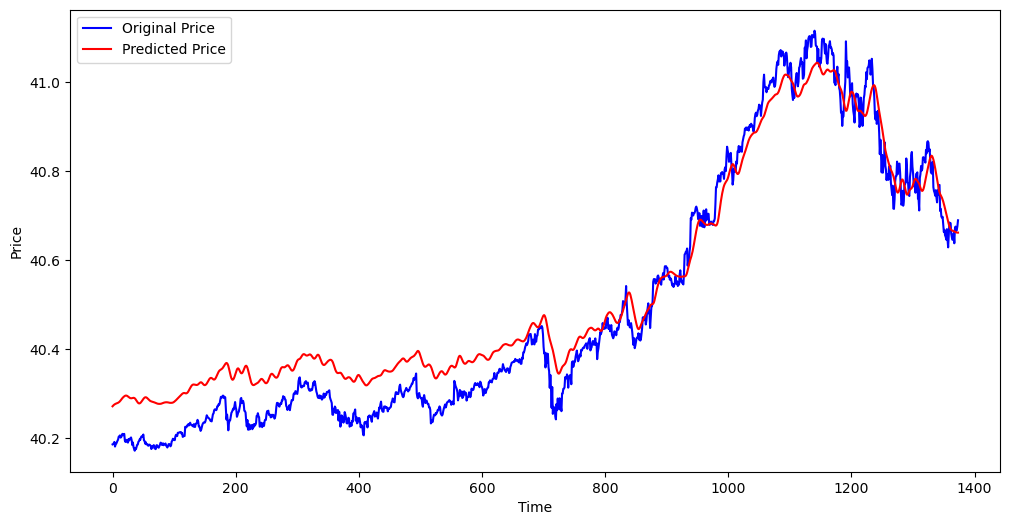

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()